We'll go through an analyze an XDF using some util functions provided.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import eeg_utils as ez

First we'll load in our synthetic data which is saved in `./data/SynthData.xdf`

In [2]:
fname = './data/SynthData.xdf'
raw_eeg = ez.loadxdf(fname)

# Let's print out raw_eeg's keys (it's a dict)
print(raw_eeg.keys())

dict_keys(['eeg_data', 'eeg_time', 'event_data', 'event_time', 'channels', 'fs', 'fs_i'])


Our raw data is stored in `raw_eeg['eeg_data']` so let's check out that shape

In [3]:
print(f"Shape of our data is: {raw_eeg['eeg_data'].shape}")

Shape of our data is: (43303, 34)


Which means we have 43,303 samples and 34 channels. We also have events in this dataset which are stored in `raw_eeg['event_data']`.

(For students who took COGS 189, this data should look *very* familiar)

In [4]:
print(f"Here are the events we have in our data: {raw_eeg['event_data']}")

Here are the events we have in our data: [['Hi'], ['0'], ['1'], ['0'], ['1'], ['0'], ['1'], ['0'], ['1'], ['0'], ['1']]


We can epoch to particular events (such as `'0'`) using the function `epoch` within `eeg_utils`:

In [5]:
epoch_s = -100 # 100 ms before stimulus onset
epoch_e = 600  # 600 ms after stimulus onset

erp_0 = ez.epoch(raw_eeg, epoch_s, epoch_e, '0')

Let's examine the structure of `erp_0` which is also a dict, but has a different structure than `raw_eeg`:

In [6]:
print(erp_0.keys())

dict_keys(['bin_data', 'bin_times', 'events', 'fs', 'channels'])


Our EEG data is stored in `erp_0['bin_data']` and has shape $\mathrm{epochs} \times \mathrm{samples} \times \mathrm{channels}$

In [7]:
print(erp_0['bin_data'].shape)

(5, 350, 34)


So we have:
- 5 epochs
- 350 samples per epoch
- 34 channels per sample

Let's the first epoch, all samples, first channel

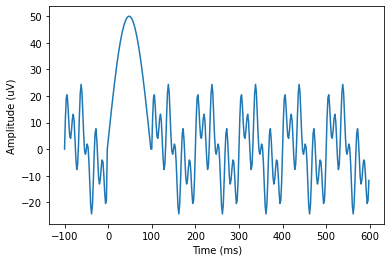

In [8]:
x = erp_0['bin_times']
y = erp_0['bin_data'][0, :, 0]

plt.plot(x, y);
plt.ylabel('Amplitude (uV)');
plt.xlabel('Time (ms)');

Now let's epoch to `'1'` and overlay both plots

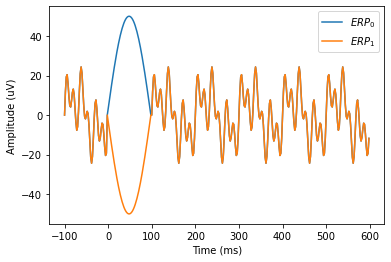

In [10]:
erp_1 = ez.epoch(raw_eeg, epoch_s, epoch_e, '1')

epoch = 0
channel = 0
y0 = erp_0['bin_data'][epoch, :, channel]
y1 = erp_1['bin_data'][epoch, :, channel]

plt.plot(x, y0, label='$ERP_0$');
plt.plot(x, y1, label='$ERP_1$');
plt.legend();
plt.ylabel('Amplitude (uV)');
plt.xlabel('Time (ms)');

Notice that we get a warning when epoching event `'1'` because the recordin